In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
from google.colab import files

# Upload a file using files.upload()
uploaded = files.upload()

# Get the file name
Haafez = next(iter(uploaded))

Saving haafez.txt to haafez.txt


In [4]:
# Read the contents of the file using open() with encoding='utf-8'
with open(Haafez, 'r', encoding='utf-8') as file:
    Haafez = file.read()


In [5]:
import re

# Use regex to match and replace all the numeric characters in the text
word = re.sub(r'\d+', '', Haafez)

# Split the string into words using the .split() method
words = word.split()

# Reverse the order of the words in the list using slicing
reversed_words = words[::-1]

# Join the words back together using the .join() method
Haafez_r= " ".join(reversed_words)


In [6]:
tokenizer = Tokenizer()
max_sequence_len = 6
sentences=[]
alltext=[]
corpus = Haafez
alltext.append(corpus)
words = corpus.split(" ")
range_size = len(words)-max_sequence_len
for i in range(0, range_size):
	thissentence=""
	for word in range(0, max_sequence_len-1):
		word = words[i+word]
		thissentence = thissentence + word
		thissentence = thissentence + " "
	sentences.append(thissentence)
 

oov_tok = "<OOV>"
vocab_size=2700
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok, split=" ", char_level=False)
tokenizer.fit_on_texts(alltext)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

input_sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
#max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

{'<OOV>': 1, 'ﮐﻪ': 2, 'و': 3, 'ﺑﻪ': 4, 'از': 5, 'در': 6, 'ﺗﻮ': 7, 'ز': 8, 'اﯾﻦ': 9, 'آن': 10, 'ﻣﻦ': 11, 'اﺳﺖ': 12, 'ﺑﺮ': 13, 'دل': 14, 'را': 15, 'ﭼﻪ': 16, 'ﻣﺎ': 17, 'ﺣﺎﻓﻆ': 18, 'اي': 19, 'ﭼﻮ': 20, 'ﺳﺮ': 21, 'ﺑﺎ': 22, 'ﺗﺎ': 23, 'ﻫﺮ': 24, 'ﮔﺮ': 25, 'ﺑﻮد': 26, 'ﻣﯽ': 27, 'ﻧﯿﺴﺖ': 28, 'ﺷﺪ': 29, 'او': 30, 'ﺑﺎد': 31, 'ﺟﺎن': 32, 'ﭼﻮن': 33, 'ﻋﺸﻖ': 34, 'دﺳﺖ': 35, 'ﻧﻪ': 36, 'ﺧﻮش': 37, 'ﮔﻞ': 38, 'ﭼﺸﻢ': 39, 'ﮐﺮد': 40, 'اﮔﺮ': 41, 'ﺧﻮد': 42, 'روي': 43, 'ﯾﺎر': 44, 'ﮐﻦ': 45, 'زﻟﻒ': 46, 'ﻏﻢ': 47, 'ﻫﻤﻪ': 48, 'ﺟﻬﺎن': 49, 'ﮐﺎر': 50, 'دارد': 51, 'ره': 52, 'ﮔﻔﺖ': 53, 'ﺧﺎك': 54, 'ﺟﺎم': 55, 'دوﺳﺖ': 56, 'ﮐﺲ': 57, 'ﺧﻮن': 58, 'ﮐﺰ': 59, 'آب': 60, 'ﻟﺐ': 61, 'ﺑﯽ': 62, 'ﯾﮏ': 63, 'ﺑﺎده': 64, 'دﯾﺪه': 65, 'ﺳﺎﻗﯽ': 66, 'آﻣﺪ': 67, 'ﺻﺒﺎ': 68, 'ﯾﺎد': 69, 'ﻣﺮا': 70, 'ﺧﺪا': 71, 'ﺑﺎﺷﺪ': 72, 'دم': 73, 'راه': 74, 'ﮐﻨﻢ': 75, 'ﯾﺎ': 76, 'ﮐﻨﺪ': 77, 'ﺻﺪ': 78, 'ﻫﻢ': 79, 'رﻓﺖ': 80, 'رخ': 81, 'ﻧﻈﺮ': 82, 'ﺳﺨﻦ': 83, 'ﺷﻮد': 84, 'ﺷﺐ': 85, 'ﺣﺴﻦ': 86, 'ﭘﯿﺮ': 87, 'ار': 88, 'ﺷﻤﻊ': 89, 'روز': 90, 'ﺑﻮي': 91, 'ﮐﯽ': 92, 'ﺑﯿﺎ': 93, 'ﻣﮑﻦ': 94, 'ﺑﺲ': 95

In [7]:
print(xs.shape)

(255731, 5)


In [8]:
print(xs[:20])

[[   0    0    0    0    1]
 [   0    0    0    1 1036]
 [   0    0    1 1036   76]
 [   0    1 1036   76    1]
 [   1 1036   76    1    1]
 [   0    0    0    0   76]
 [   0    0    0   76    1]
 [   0    0   76    1    1]
 [   0   76    1    1    1]
 [   0    0    0    0    1]
 [   0    0    0    1    1]
 [   0    0    1    1    1]
 [   0    1    1    1    1]
 [   0    0    0    0    1]
 [   0    0    0    1    1]
 [   0    0    1    1    1]
 [   0    1    1    1    3]
 [   0    0    0    0    1]
 [   0    0    0    1    1]
 [   0    0    1    1    3]]


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 16, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)
model.save("bidiirish2.h5")

Epoch 1/100


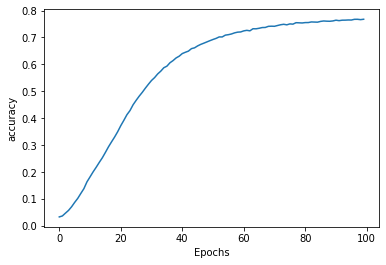

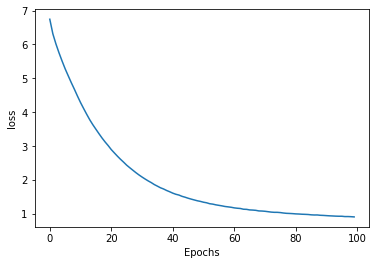

In [143]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


# Text Generator
(based on words)

In [146]:
seed_text = "نقاش ازل به"

# # Split the string into words using the .split() method
# words = seed_text_r.split()

# # Reverse the order of the words in the list using slicing
# reversed_words = words[::-1]

# # Join the words back together using the .join() method
# seed_text = " ".join(reversed_words)
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = ""
    # get the index of the maximum value in the predicted array
    pred_index = np.argmax(predicted)
    for word, index in tokenizer.word_index.items():
        if index == pred_index:
            output_word = word
            break
    seed_text += " " + output_word


# # Split the string into words using the .split() method
# words = seed_text.split()

# # Reverse the order of the words in the list using slicing
# reversed_words = words[::-1]

# # Join the words back together using the .join() method
# seed_text = " ".join(reversed_words)


print(seed_text)


نقاش ازل به خدا خاست نیستم بین حجاب شعله ورم گیر کرده ام را کم نکرد سیل آمد، برد با خود باور به توان دیگری کشوری را با بر من این همه اندوه را آبشخور اندوه می بینی آینده خود مختصر ندید و به سوی تو خوانده نگاه سوت غریبی ست نگاه مثل صدا نیست صدا سکوت غریبی ست نه، نه، نگاه پرنده ست پرش سقوط غریبی ست نگاه مثل صدا نیست صدا سکوت غریبی ست نه، نه، نگاه پرنده ست پرش سقوط غریبی ست نگاه مثل صدا نیست صدا سکوت غریبی ست نه، نه، نگاه پرنده ست پرش سقوط غریبی ست نگاه


# Text Generator
(based on sentence)


In [147]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [148]:
tokenizer = Tokenizer()

corpus = Haafez.split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [149]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [150]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])

In [159]:
seed_text = "محدود به خود بکن جهان را "
# Split the string into words using the .split() method
words = seed_text_r.split()

# Reverse the order of the words in the list using slicing
reversed_words = words[::-1]

# Join the words back together using the .join() method
seed_text = " ".join(reversed_words)
next_words = 100

In [160]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = ""
    # get the index of the maximum value in the predicted array
    pred_index = np.argmax(predicted)
    for word, index in tokenizer.word_index.items():
        if index == pred_index:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

بتا برخیز گودال در بین و بالا تر تو نیست،تکی، که اینجا، را تخت ی تو ای از نه تمام های که که که که که این خود ، گنگم روشن داده هر لبم ذوق نه،سلطه همه مرا تو بیشترم شوید آفتاب،آب،گندم من فتح فربه با جرقه که انگار فربه مرا و تک نیست را خودش زندگی خود ای خواب تن آنچه ای شده اند تو موج من، گروه بر یک انگار دیدن عدم فاجعه نیست که را لمس تو در خود فراگرفت است را شوی در زمان تکنفره افتاد ام فراگرفت فربه ام ضعیف عمری معترض است در بین انتها اگر
